In [1]:
import numpy as np
import pandas as pd
import hiive.mdptoolbox 
import hiive.mdptoolbox.mdp
import hiive.mdptoolbox.example
import mdptoolbox, mdptoolbox.example
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
import gym
from gym import envs
from gym import wrappers
from gym.envs.toy_text.frozen_lake import generate_random_map, FrozenLakeEnv
import matplotlib.pyplot as plt
import time
import openai
import re
import time

In [2]:
env = gym.make("Taxi-v3") 

In [3]:
observation = env.reset()
t = 10
for s in range(t+1):
    print(f"step: {s} out of {t}")
    action = env.action_space.sample()
    env.step(action)
    #env.render()
env.close()

step: 0 out of 10
step: 1 out of 10
step: 2 out of 10
step: 3 out of 10
step: 4 out of 10
step: 5 out of 10
step: 6 out of 10
step: 7 out of 10
step: 8 out of 10
step: 9 out of 10
step: 10 out of 10


In [4]:
env_name = "Taxi-v3"
env = gym.make("Taxi-v3")
env.reset()
#env.render()
transitions = env.P
actions = int(re.findall(r'\d+', str(env.action_space))[0])
states = int(re.findall(r'\d+', str(env.observation_space))[0])
P = np.zeros((actions, states, states))
R = np.zeros((states, actions))

In [5]:
for state in range(states):
    for action in range(actions):
        for i in range(len(transitions[state][action])):
            tran_prob = transitions[state][action][i][0]
            states = transitions[state][action][i][1]
            R[state][action] += tran_prob*transitions[state][action][i][2]
            P[action, state, states] += tran_prob

In [6]:
def policyIteration():
    df_pi = pd.DataFrame()
    for gamma in [0.1, 0.5, 0.9]:
        df = pd.DataFrame()
        pi = PolicyIteration(P, R, max_iter=int(1e10), gamma=gamma)
        df = pd.DataFrame(pi.run())
        df["gamma"] = gamma
        df_pi = pd.concat([df, df_pi], ignore_index=True)
        #print(df_pi)
    return df_pi
start_pi_time = time.time()
df_pi = policyIteration()
end_pi_time = time.time()
pi_exec_time = end_pi_time - start_pi_time

In [7]:
df_pi

,State,Action,Reward,Error,Time,Max V,Mean V,Iteration,gamma
0,None,None,11.000000,1.890000e+01,0.003521,11.000000,-9.572012,1,0.9
1,None,None,100.526316,8.952632e+01,0.008498,100.526316,-3.105669,2,0.9
2,None,None,100.526316,8.057368e+01,0.011518,100.526316,1.453691,3,0.9
3,None,None,100.526316,7.251632e+01,0.015167,100.526316,5.686195,4,0.9
4,None,None,100.526316,6.526468e+01,0.018561,100.526316,9.995390,5,0.9
5,None,None,100.526316,5.873822e+01,0.021036,100.526316,14.709723,6,0.9
6,None,None,100.526316,5.286439e+01,0.023444,100.526316,19.724462,7,0.9
7,None,None,100.526316,4.757795e+01,0.028147,100.526316,24.110024,8,0.9
8,None,None,100.526316,4.282016e+01,0.031114,100.526316,27.391430,9,0.9
9,None,None,100.526316,3.121590e+01,0.034616,100.526316,30.583484,10,0.9


In [8]:
def valueIteration():
    df_vi = pd.DataFrame()
    for gamma in [0.1, 0.5, 0.9]:
        df = pd.DataFrame()
        vi = ValueIteration(P, R, max_iter=int(1e10), gamma=gamma)
        df = pd.DataFrame(vi.run())
        df["gamma"] = gamma
        df_vi = pd.concat([df, df_vi], ignore_index=True)
    return df_vi
start_vi_time = time.time()
df_vi = valueIteration()
end_vi_time = time.time()
vi_exec_time = end_vi_time - start_vi_time

In [9]:
df_vi

,State,Action,Reward,Error,Time,Max V,Mean V,Iteration,gamma
0,None,None,20.000000,21.000000,0.000682,20.000000,-0.832000,1,0.9
1,None,None,19.100000,18.900000,0.001667,19.100000,-1.316200,2,0.9
2,None,None,35.300000,17.010000,0.002418,35.300000,-1.479820,3,0.9
3,None,None,34.571000,15.309000,0.003849,34.571000,-1.320898,4,0.9
4,None,None,47.693000,13.778100,0.004519,47.693000,-0.764525,5,0.9
...,...,...,...,...,...,...,...,...,...
104,None,None,25.994141,0.020508,0.009760,25.994141,-0.922814,11,0.5
105,None,None,25.993652,0.010254,0.010515,25.993652,-0.919796,12,0.5
106,None,None,20.000000,21.000000,0.000457,20.000000,-0.832000,1,0.1
107,None,None,19.900000,2.100000,0.001154,19.900000,-0.885800,2,0.1


In [10]:
def qlearning():
    df_q = pd.DataFrame()
    for eps in [0, 0.5, 1]:
        temp_df = pd.DataFrame()
        for alpha in [0.1, 0.5, 0.9, 1]:
            vi = QLearning(P, R, gamma=0.9, epsilon=eps, alpha=alpha, n_iter=100000)
            df = pd.DataFrame(vi.run())
            df["epsilon_start"] = eps
            df["alpha_start"] = alpha
            df_q = pd.concat([df, df_q], ignore_index=True)
    return df_q
start_q_time = time.time()
df_q = qlearning()
end_q_time = time.time()
q_exec_time = end_q_time - start_q_time

In [11]:
df_q

,State,Action,Reward,Error,Time,Alpha,Epsilon,Gamma,Max V,Mean V,Iteration,epsilon_start,alpha_start
0,389,3,-1.0,0.053459,0.001657,0.913517,0.913517,0.9,0.000000,0.000000,10,1.0,1.0
1,169,3,-1.0,0.826169,0.003322,0.826169,0.826169,0.9,0.000000,0.000000,20,1.0,1.0
2,49,0,-1.0,0.747172,0.004300,0.747172,0.747172,0.9,0.000000,0.000000,30,1.0,1.0
3,149,5,-10.0,6.757290,0.005406,0.675729,0.675729,0.9,0.000000,-0.001479,40,1.0,1.0
4,49,3,-1.0,0.573013,0.006014,0.611117,0.611117,0.9,0.000000,-0.002804,50,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,475,4,-1.0,0.007534,13.082626,0.001000,0.100000,0.9,19.478961,0.155930,99960,0.0,0.1
119996,475,4,-1.0,0.007537,13.084638,0.001000,0.100000,0.9,19.478961,0.156095,99970,0.0,0.1
119997,475,4,-1.0,0.007540,13.086656,0.001000,0.100000,0.9,19.478961,0.156260,99980,0.0,0.1
119998,475,4,-1.0,0.007542,13.088661,0.001000,0.100000,0.9,19.478961,0.156425,99990,0.0,0.1


In [12]:
def gamma_plot(df, metric="Mean V"):
    plt.plot(df[df.gamma==0.1][metric], label="gamma=0.1")
    plt.plot(df[df.gamma==0.5][metric], label="gamma=0.5")
    plt.plot(df[df.gamma==0.9][metric], label="gamma=0.9")
    plt.legend()

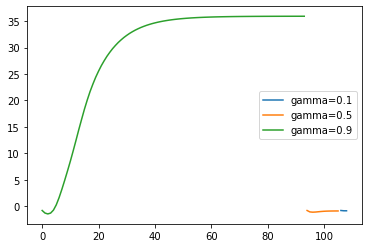

In [13]:
gamma_plot(df_vi)

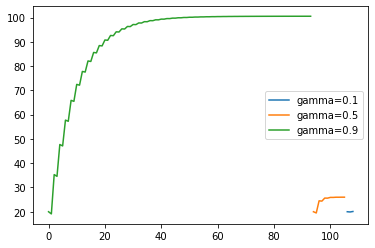

In [14]:
gamma_plot(df_vi, metric="Max V")

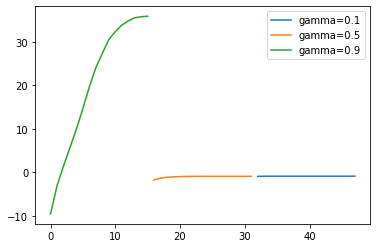

In [15]:
gamma_plot(df_pi)

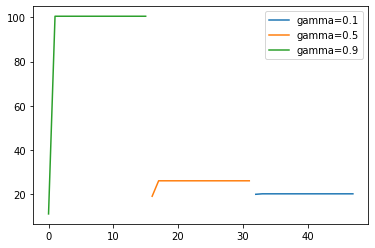

In [16]:
gamma_plot(df_pi, metric="Max V")

In [17]:
def plot_eps(df, metric="Mean V"):
    plt.plot(df[df.epsilon_start==0][metric], label="epsilon=0")
    plt.plot(df[df.epsilon_start==0.5][metric], label="epsilon=0.5")
    plt.plot(df[df.epsilon_start==1][metric], label="epsilon=1")
    plt.legend()

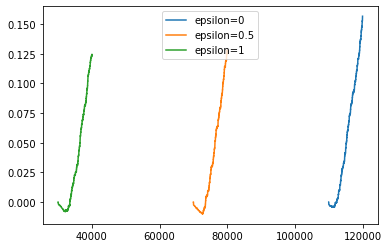

In [18]:
plot_eps(df_q[df_q.alpha_start==0.1], "Mean V")

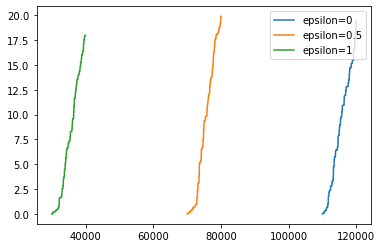

In [19]:
plot_eps(df_q[df_q.alpha_start==0.1], "Max V")

In [20]:
def plot_alpha(df, metric="Mean V"):
    plt.plot(df[df.alpha_start==0.1][metric], label="alpha=0.1")
    plt.plot(df[df.alpha_start==0.5][metric], label="alpha=0.5")
    plt.plot(df[df.alpha_start==1][metric], label="alpha=1")
    plt.legend()

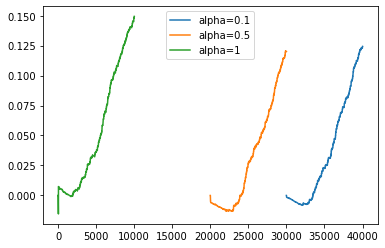

In [21]:
plot_alpha(df_q[df_q.epsilon_start==1], "Mean V")

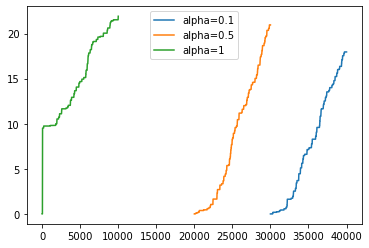

In [22]:
plot_alpha(df_q[df_q.epsilon_start==1], "Max V")

In [23]:
def comparative_plot(metric="Mean V"):
    plt.plot(df_pi[metric], label="Policy Iteration")
    plt.plot(df_vi[metric], label="Value Iteration")
    plt.plot(df_q[metric], label="Q Learning")
    plt.legend()

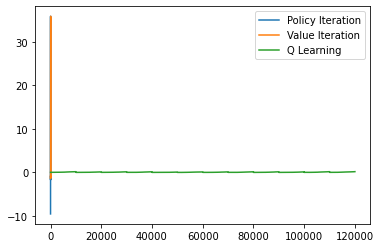

In [24]:
comparative_plot("Mean V")

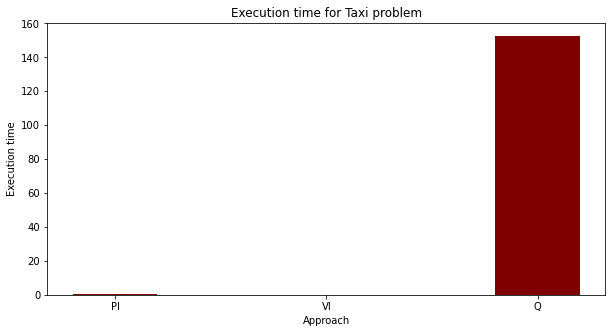

In [25]:
# Execution times analysis
learner = ['PI','VI','Q']
exec_times = [pi_exec_time, vi_exec_time, q_exec_time]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(learner, exec_times, color ='maroon',
        width = 0.4)
 
plt.xlabel("Approach")
plt.ylabel("Execution time")
plt.title("Execution time for Taxi problem")
plt.show()

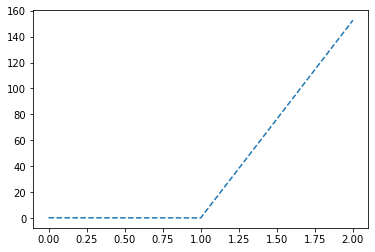

In [26]:
plt.plot(exec_times, linestyle = 'dashed')